#Lectura del dataset y selección de variables
*(Dataset obsoleto, extraer directamnete de `train_data.csv` y no limpiar)*

In [3]:
# Importar drive y pandas
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Definir el directorio de drive en el que está el dataset
directorio_dataset = '/content/drive/MyDrive/TFM Big Data & BA/Propuestas/Proyecto Final/0 - Dataset/train_t.csv'

# Leemos el dataset
df = pd.read_csv(directorio_dataset)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df

,Unnamed: 0,item_id,user_id,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,cat_category_name,cat_city,cat_param_1,cat_parent_category_name,cat_region
0,0,b912c3c6a6ad,e00f8ff2eaf9,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",4.8,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Goods for children and toys,Yekaterinburg,Bed dress,Personal things,Sverdlovsk region
1,1,2dac0150717d,39aeb48f0017,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",36.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,Furniture and interior,Samara,Other,For home and cottage,Samara Region
2,2,ba83aefab5dc,91e2f88dd6e3,NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",48.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Audio and video,Rostov-on-Don,"Video, DVD and Blu-ray Players",Consumer electronics,Rostov region
3,3,02996f1dd2ea,bf5cccea572d,NaN,NaN,Автокресло,Продам кресло от0-25кг,26.4,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Goods for children and toys,Naberezhnye Chelny,Car chairs,Personal things,Tatarstan
4,5,51e0962387f7,bbfad0b1ad0a,NaN,NaN,Авто люлька,В хорошем состоянии,15.6,9,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323,Goods for children and toys,Chistopol,Car chairs,Personal things,Tatarstan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064949,1503416,a927b25d4daa,5db5d1e60f38,Обувь,38,"Резиновые сапоги Lucky Land, размер 36,37,38.Н...","Продам Новые резиновые сапоги Lucky Land, разм...",2.4,89,2017-03-24,Private,3c67c7fca10a8e7a0b104248b8731394fd6871ef164b0d...,494.0,0.00000,"Clothes, shoes, accessories",Tula.,Women's clothing,Personal things,Tula region
1064950,1503418,8ab4c1e56046,97146e7aea69,Платья и юбки,48–50 (XL),"Платье фирмы zarina, размер 50","В хорошем состоянии, ткань плотная (рисунок т...",6.0,10,2017-03-17,Private,18f8dffacd5516ec8b824a2e846d8d12d75a7a964804a7...,387.0,0.12869,"Clothes, shoes, accessories",Orenburg,Women's clothing,Personal things,Orenburg region
1064951,1503419,5e6b7f0f3f65,dd05217165ea,Обувь,26,Ботиночки,NaN,3.6,7,2017-03-20,Private,2da79294c6f23f61d4bf6a8f4034f87e2f318b7e32c68b...,88.0,0.25019,Children's clothing and shoes,Permian,For girls,Personal things,Perm region
1064952,1503422,f782f2ad9349,2d3ac1f5a7b3,Обувь,27,Туфли-балетки,Продам красивые туфли в хорошем состоянии!,4.2,33,2017-03-22,Private,6b4285c22388a5dae37c3d390d3e1b174f7a980d9e3919...,87.0,0.00000,Children's clothing and shoes,Berezniki,For girls,Personal things,Perm region


In [5]:
#!pip install termcolor
from termcolor import colored
import numpy as np

# Selección de variables
df = df[['item_id', 'price', 'user_type', 'deal_probability', 'cat_category_name', 'cat_param_1', 'cat_city', 'cat_region', 
         'image', 'description']]

# Tratamiento de ducplicados, nulos y formatos
print(colored('Registros duplicados:', 'blue', attrs=['bold']), df.duplicated().sum(), '\n')
print(colored('Registros nulos:', 'blue', attrs=['bold']))
print(df.isnull().sum(), '\n')

print(colored('Borramos los nulos de la variable "price".', 'blue', attrs=['bold']), '\n')
df = df[df.price.notnull()]

print(colored('Registros nulos:', 'blue', attrs=['bold']))
print(df.isnull().sum(),'\n')

print(colored('Existen', 'blue', attrs=['bold']), df.cat_param_1[df.cat_param_1 == 'Nan.'].count(),
      colored('nulos con el valor "Nan." en cat_patam_1. Los cambiamos por NaN.\n', 'blue', attrs=['bold']))
from numpy.core.numeric import NaN
df.cat_param_1[df.cat_param_1 == 'Nan.'] = NaN
print(colored('No borramos nulos de la variable cat_city y cat_param_1 aún porque no sabemos ni si la vamos a utilizar en el modelo ni cómo.\n', 'blue', attrs=['bold']))
print(colored('En el caso de las variables image y description, dejamos los NaN ya que generaremos variables dicotómicas que indiquen si poseen o no valores para éstas.\n', 'blue', attrs=['bold']))

print(colored('Número de registros en el dataset:', 'blue', attrs=['bold']), len(df), '\n')

print(colored('Formato de las variables sin modificar:', 'blue', attrs=['bold']))
print(df.info(), '\n')

df.cat_region = df.cat_region.astype("category")
df.cat_city = df.cat_city.astype("category")
df.cat_category_name = df.cat_category_name.astype("category")
df.cat_param_1 = df.cat_param_1.astype("category")
df.user_type = df.user_type.astype("category")

print(colored('Formato de las variables modificadas:', 'blue', attrs=['bold']))
print(df.info(), '\n')

# Creación de la variable objetivo binaria 'sold'
def to_sold(v):
  if v == 0: x = 0
  else: x = 1
  return x

df["sold"] = df.deal_probability.apply(to_sold)

# Creación de la variable binaria 'hasimage'

df['has_image'] = np.where(df['image'].isnull(), 0, 1)
df['has_description'] = np.where(df['description'].isnull(), 0, 1)
df.drop(['image', 'description', 'param_3'], axis = 1, inplace = True)

# Cambiamos el nombre final de las variables
df.columns = ['id', 'price', 'user_type', 'deal_probability', 'category', 'subcategory', 'city', 'region', 'sold', 
              'has_image', 'has_description']

Registros duplicados: 0 

Registros nulos:
item_id                   0
price                 28245
user_type                 0
deal_probability          0
cat_category_name         0
cat_param_1               1
cat_city                101
cat_region                0
image                 25936
description          105351
dtype: int64 

Borramos los nulos de la variable "price". 

Registros nulos:
item_id                   0
price                     0
user_type                 0
deal_probability          0
cat_category_name         0
cat_param_1               1
cat_city                 94
cat_region                0
image                 22433
description          102902
dtype: int64 

Existen 26978 nulos con el valor "Nan." en cat_patam_1. Los cambiamos por NaN.

No borramos nulos de la variable cat_city y cat_param_1 aún porque no sabemos ni si la vamos a utilizar en el modelo ni cómo.

En el caso de las variables image y description, dejamos los NaN ya que generaremos variables dico

KeyError: ignored

In [ ]:
# Minería y merge de las nuevas variables con información por región
directorio_dataset_2 = '/content/drive/MyDrive/TFM Big Data & BA/Propuestas/Proyecto Final/3 - Machine Learning/More Data/caract_cities.csv'
more_data = pd.read_csv(directorio_dataset_2, sep = ';')

more_data.region = more_data.region.astype('category')
more_data.population = more_data.population.str.replace('.', '').astype(int)
more_data.wage = more_data.wage.str.replace(',', '.').astype(float)
more_data.wage_fd = pd.to_numeric(more_data.wage_fd, errors = 'coerce')
more_data.ratio_population_wage = more_data.ratio_population_wage.str.replace(',', '.').astype(float)
more_data.ratio_wages_fd_region = more_data.ratio_wages_fd_region.str.replace(',', '.').astype(float)
more_data.porc_population_russia = more_data.porc_population_russia.str.replace(',', '.').astype(float)
more_data.federal_district = more_data.federal_district.astype('category')

df = df.merge(more_data, on='region', how='left')
df.head(5)

#EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Histograma "deal_probability":


(array([796644.,  57822.,  37277.,  23956.,  10792.,   3267.,   1125.,
          1928.,  28603.,  75295.]),
 array([0.      , 0.086521, 0.173042, 0.259563, 0.346084, 0.432605,
        0.519126, 0.605647, 0.692168, 0.778689, 0.86521 ]),
 <a list of 10 Patch objects>)

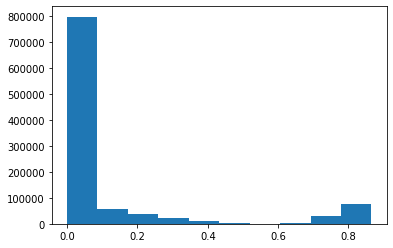

In [7]:
print(colored('Histograma "deal_probability":', 'blue', attrs=['bold']))
plt.hist(df.deal_probability)

In [8]:
print(colored('Tabla de frecuencias de la variable "sold":', 'blue', attrs=['bold']))
print(pd.crosstab(index = df["sold"], columns="count"))

Tabla de frecuencias de la variable "sold":
col_0   count
sold         
0      782482
1      254227


In [9]:
print(colored('%sold=0:', 'blue', attrs=['bold']),
      round(len(df[df["sold"]==0])/len(df["sold"])*100,2))

%sold=0: 75.48


Diagrama de barras "user_type":


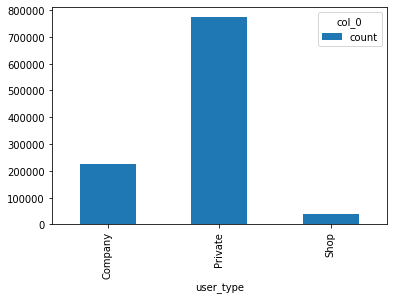

In [10]:
print(colored('Diagrama de barras "user_type":', 'blue', attrs=['bold']))
cat_val = pd.crosstab(index = df["user_type"], columns="count")
cat_val.plot.bar()

In [11]:
print(df[['user_type', 'sold', 'deal_probability']].groupby('user_type').agg('mean'), '\n')
print(colored('Existe una mayor probabilidad de venta en el caso de los registros user_type = "Private"', 'blue', attrs=['bold']))

               sold  deal_probability
user_type                            
Company    0.219220          0.100034
Private    0.256923          0.117238
Shop       0.160892          0.050922 

Existe una mayor probabilidad de venta en el caso de los registros user_type = "Private"


In [12]:
print(colored('Diagrama de barras "category":', 'blue', attrs=['bold']))
cat_val = pd.crosstab(index = df["category"], columns = "count")
cat_val.plot.bar()

Diagrama de barras "category":


KeyError: ignored

In [13]:
print(df[['category', 'sold', 'deal_probability']].groupby('category').agg('mean'), '\n')
print(colored('Existe una mayor probabilidad de venta en el caso de los registros category = ["Appliances", "Bicycles", "Motorcycles and motorcycles"]', 'blue', attrs=['bold']))

KeyError: ignored

In [14]:
n = df.subcategory.unique()
print(colored('Posibles valores para la variables categórica "subcategory":', 'blue', attrs=['bold']), len(n))

AttributeError: ignored

In [ ]:
n = df.city.unique()
print(colored('Posibles valores para la variables categórica "city":', 'blue', attrs=['bold']), len(n))

In [ ]:
print(colored('Diagrama de barras "region":', 'blue', attrs=['bold']))
reg_val = pd.crosstab(index = df["region"], columns = "count")
reg_val.plot.bar()

In [ ]:
print(df[['region', 'sold', 'deal_probability']].groupby('region').agg('mean'), '\n')
print(colored('No existe una diferencia muy grande entre regiones.', 'blue', attrs=['bold']))

In [ ]:
print(colored('Histograma "price":', 'blue', attrs=['bold']))
plt.hist(df.price)
print(colored('Gran tendencia hacia la izquierda, deberemos estudiar los outliers', 'blue', attrs=[]))

In [ ]:
print(pd.crosstab(index = df[df.price > 10000]["category"], columns = "count"), '\n')
print(colored('Posibles categorías outlier: ["Motorcycles and motorcycles", "Repair and construction"]', 'blue', attrs=['bold']))

In [ ]:
print(colored('has_image:\n', 'blue', attrs=['bold']),
      pd.crosstab(index = df["has_image"], columns = "count"))
print('')
print(colored('has_description:\n', 'blue', attrs=['bold']),
      pd.crosstab(index = df["has_description"], columns = "count"))

In [ ]:
sns.heatmap(df[['price', 'deal_probability', 'sold', 'has_image', 'has_description', 
                'population', 'wage', 'wage_fd', 'ratio_population_wage', 'ratio_wages_fd_region',
                'porc_population_russia']].corr())

#Encoding y Dummificación

##Encoding

In [15]:
df_enc = df.copy()
df_enc["category"] = df_enc["category"].cat.codes
df_enc["subcategory"] = df_enc["subcategory"].cat.codes
df_enc["region"] = df_enc["region"].cat.codes
df_enc["city"] = df_enc["city"].cat.codes
df_enc["user_type"] = df_enc["user_type"].cat.codes
df_enc["federal_district"] = df_enc["federal_district"].cat.codes
df_enc.head(5)

KeyError: ignored

##Dummificaciones

In [ ]:
df_dum = pd.concat([df, 
                    pd.get_dummies(df.user_type), 
                    pd.get_dummies(df.category), 
                    pd.get_dummies(df.subcategory), 
                    pd.get_dummies(df.region),
                    pd.get_dummies(df.federal_district)], 
                   axis = 1)
df_dum.drop(['user_type', 'category', 'subcategory', 'region', 'city', 'federal_district'], axis = 1, inplace = True)
df_dum.head(5)

In [ ]:
df_dum.columns = ['id',	'price',	'deal_probability',	'sold',	'has_image',	'has_description', 'population',	'wage',	'wage_fd',	'ratio_population_wage',	'ratio_wages_fd_region',	'porc_population_russia',	'Company',	'Private',	'Shop',	'Appliances',	'Audio and video',	'Bicycles',	'Books and magazines',	'Childrens clothing and shoes',	'Clock and decorations',	'Clothes, shoes, accessories',	'Collecting',	'Computer goods',	'Cookware and kitchen goods',	'Desktop computers',	'Furniture and interior',	'Games, consoles and programs',	'Goods for children and toys',	'Goods for pets',	'Laptops',	'Motorcycles and motorcycles',	'Musical instruments',	'Office equipment and consumables',	'Phones',	'Repair and construction',	'Tablets and e-books',	'ASUS',	'Accessories',	'Accordions, harmony, accordions',	'Acer.',	'Acoustics',	'Acoustics, columns, subwoofers',	'Alcatel.',	'Amplifiers and receivers',	'Ashtrays, lighters',	'BK',	'Baby strollers',	'Banknotes',	'Bed dress',	'Beds, sofas and armchairs',	'Bicycles and scooters',	'Bijouterie',	'BlackBerry.',	'Books',	'Brands',	'Buggy',	'Building materials',	'Cabinets and dressers',	'Cables and adapters',	'Calendars',	'Camcorder',	'Car chairs',	'Ceilings',	'Celebrity things, autographs',	'Chancellery',	'Childrens',	'Childrens furniture',	'Climatic equipment',	'Clock',	'Coins',	'Components',	'Computer games',	'Computer tables and armchairs',	'Consumables',	'Dexp.',	'Documentation',	'Doors',	'Drums',	'E-books',	'Envelopes and postcards',	'Explay',	'Fireplaces and heaters',	'Flashki and memory cards',	'Fly',	'For boys',	'For girls',	'For home',	'For individual care',	'For kitchen',	'For studio and concerts',	'Games',	'Games for consoles',	'Gaming consoles',	'Garden machinery',	'Goods for feeding',	'Goods for kitchen',	'Goods for school',	'Gramplastics',	'Guitars and other string',	'HTC',	'Headphones',	'Highscreen.',	'Huawei.',	'Interior items, art',	'Jewelry',	'Joysticks and rules',	'Karting',	'Keyboard and mouse',	'Kinder Surprise',	'Kitchen headsets',	'LG',	'Labels, Bottles, Tubes',	'Lenovo.',	'Lighting',	'MFP, copiers and scanners',	'MP3 players',	'MTS',	'Magazines, newspapers, brochures',	'Meizu.',	'Mens clothing',	'Micromax',	'Microphones',	'Microsoft.',	'Military things',	'Mining',	'Models',	'Monitors',	'Mopeds and scooters',	'Motorcycles',	'Motorola.',	'Music and films',	'Music centers, radio tape recorders',	'Nokia.',	'Other',	'Other brands',	'Overseas',	'Paintings',	'Panasonic',	'Paper shredders',	'Parts and Accessories',	'Philips.',	'Photos, letters',	'Piano and other keys',	'Plastic cards',	'Plumbing and sauna',	'Portable hard drives',	'Postcards',	'Prestigio.',	'Printers',	'Products for bathing',	'Programs',	'Quadrocycles',	'Radio',	'Road',	'Rooms and SIM Cards',	'Samsung.',	'Siemens.',	'Snowmobiles',	'Sony',	'Sport cards',	'Stands and Tombs',	'Stationary phones',	'TV tuners',	'Tables and chairs',	'Tablets',	'Tableware',	'TeXet.',	'Telephony',	'Televisions and projectors',	'Textiles and carpets',	'Tickets',	'Tokens, medals, badges',	'Tools',	'Toys',	'Tutorial',	'UPS, Network Filters',	'VMK',	'Vegethers',	'Vertu.',	'Video, DVD and Blu-ray Players',	'Violins and other bow',	'Weapons layouts',	'Webcams',	'Windows and balconies',	'Womens clothing',	'Xiaomi.',	'ZTE',	'iPhone.',	'network hardware',	'Altai region',	'Bashkortostan',	'Belgorod region',	'Chelyabinsk region',	'Irkutsk region',	'Kaliningrad region',	'Kemerovo Region',	'Khanty-Mansiysk JSC',	'Krasnodar region',	'Krasnoyarsk region',	'Nizhny Novgorod Region',	'Novosibirsk region',	'Omsk Oblast',	'Orenburg region',	'Perm region',	'Rostov region',	'Samara Region',	'Saratov region',	'Stavropol region',	'Sverdlovsk region',	'Tatarstan',	'Tula region',	'Tyumen region',	'Udmurtia',	'Vladimir region',	'Volgograd region',	'Voronezh region',	'Yaroslavskaya oblast',	'Central',	'North Caucasian',	'Northwestern',	'Siberian',	'Southern',	'Ural',	'Volga']

#Regresión Lineal (`deal_probability`)
* **R-squared**: 0.122
* **%Correct Quarter Prediction**: 80.35% (*Puede que por el desbalanceo*)

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

##`statsmodels`

In [ ]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# División de los datos en train y test
df_dum_2 = df_dum.copy()
df_dum_2.drop(['id', 'deal_probability', 'sold'], axis = 1, inplace = True)
X = df_dum_2
y = df_dum['deal_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234, shuffle = True)

In [ ]:
# Creación del modelo utilizando matrices 
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
# print(modelo.summary())

In [ ]:
# Eliminamos p-valores > 0.15
p_values = modelo.summary2().tables[1]['P>|t|']
pv = pd.DataFrame(p_values)
to_drop = pv[pv['P>|t|'] > 0.15].sort_values(by='P>|t|', ascending=False).index

In [ ]:
# División de los datos en train y test (2)
df_dum_2.drop(to_drop, axis = 1, inplace = True)
X = df_dum_2
y = df_dum['deal_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234, shuffle = True)

In [ ]:
# Creación del modelo utilizando matrices 
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
# print(modelo.summary())

In [ ]:
# Eliminamos p-valores > 0.15
p_values = modelo.summary2().tables[1]['P>|t|']
pv = pd.DataFrame(p_values)
to_drop = pv[pv['P>|t|'] > 0.15].sort_values(by='P>|t|', ascending=False).index
to_drop

In [ ]:
# División de los datos en train y test (3)
df_dum_2.drop(['wage_fd', 'Ural', 'Southern', 'Bashkortostan', 'ratio_population_wage',
       'porc_population_russia', 'Novosibirsk region',
       'Vladimir region', 'Udmurtia', 'Saratov region', 'Central',
       'Irkutsk region', 'ratio_wages_fd_region'], axis = 1, inplace = True)
X = df_dum_2
y = df_dum['deal_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1234, shuffle = True)

In [ ]:
# Creación del modelo utilizando matrices 
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

##Resultados `statsmodels`

In [ ]:
from sklearn.metrics import mean_squared_error

# Predicciones con intervalo de confianza del 90%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.1)

# Error de test del modelo 
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.23256734942535479


In [ ]:
# Predicciones con intervalo de confianza del 95%
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['y'] = y_train
predicciones = predicciones[['mean', 'y']]
predicciones.columns = ['y_predicted', 'y']
predicciones['error_abs'] = abs(predicciones['y_predicted'] - predicciones['y'])
predicciones['error'] = predicciones['y_predicted'] - predicciones['y']

In [ ]:
print('mean(error_abs):', predicciones['error_abs'].mean())
print('mean(error):', predicciones['error'].mean())
print('')
print('mean(error -):', predicciones['error'][predicciones['error']<0].mean())
print('len(error -):', len(predicciones['error'][predicciones['error']<0]))
print('mean(error +):', predicciones['error'][predicciones['error']>0].mean())
print('len(error +):', len(predicciones['error'][predicciones['error']>0]))
print('')
print('El error es mayor hacia la izquierda pero tiene un mayor volumen hacia la derecha.')

mean(error_abs): 0.15183330245500606
mean(error): -7.378715541135485e-11

mean(error -): -0.3525943064860225
len(error -): 178570
mean(error +): 0.09674716577981231
len(error +): 650797

El error es mayor hacia la izquierda pero tiene un mayor volumen hacia la derecha.


Histograma de los errores:


(array([   480.,  29003.,  34638.,  20671.,   4562.,  19490.,  57645.,
        472834., 136567.,  53477.]),
 array([-0.92744977, -0.79871184, -0.66997391, -0.54123597, -0.41249804,
        -0.2837601 , -0.15502217, -0.02628423,  0.1024537 ,  0.23119164,
         0.35992957]),
 <a list of 10 Patch objects>)

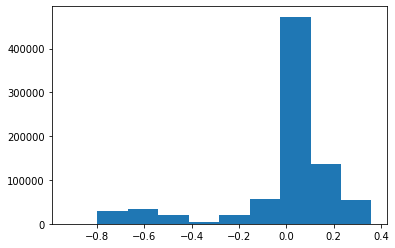

In [ ]:
import matplotlib.pyplot as plt
print(colored('Histograma de los errores:', 'blue', attrs=['bold']))
plt.hist(predicciones.error)

In [ ]:
# Intervalo +- de predicción
p_upper = 0.1
p_lower = 0.15
predicciones['y_predicted_upper'] = predicciones['y_predicted'] + p_upper
predicciones['y_predicted_lower'] = predicciones['y_predicted'] - p_lower
predicciones['y_predicted_upper'][predicciones['y_predicted_upper']>1] = 1
predicciones['y_predicted_upper'][predicciones['y_predicted_upper']<0] = 0
predicciones['y_predicted_lower'][predicciones['y_predicted_lower']>1] = 1
predicciones['y_predicted_lower'][predicciones['y_predicted_lower']<0] = 0

len_error = len(predicciones) - len(predicciones[(predicciones['y'] <= predicciones['y_predicted_upper']) & (predicciones['y'] >= predicciones['y_predicted_lower'])])
print('Existen ', len_error, ' casos de ', len(predicciones), ' en los que al aplicar un intervalo de +', p_upper, ' y -', p_lower,
      ' a la predicción, fallamos. Esto representa un ', colored(round(len_error/len(predicciones)*100, 2), 'red', attrs=[]),
      colored('%', 'red', attrs=['bold']), ' del total de registros.\n', sep = '')

Existen 256486 casos de 829367 en los que al aplicar un intervalo de +0.1 y -0.15 a la predicción, fallamos. Esto representa un 30.93% del total de registros.



In [ ]:
import numpy as np
predicciones['quarter_y'] = np.where(predicciones['y']<0.25, 1, np.where(predicciones['y']<0.5, 2, np.where(predicciones['y']<0.75, 3, 4)))
predicciones['quarter_y_p'] = np.where(predicciones['y_predicted']<0.25, 1, np.where(predicciones['y_predicted']<0.5, 2, np.where(predicciones['y_predicted']<0.75, 3, 4)))
predicciones['error_quarter'] = predicciones.quarter_y_p - predicciones.quarter_y

Estudio de errores de quarter predicho:

Total registros erroneos: 162995
% registros erroneos: 19.65%



(array([ 56540.,      0.,  27598.,      0.,      0.,  27325.,      0.,
        666372.,      0.,  51532.]),
 array([-3. , -2.6, -2.2, -1.8, -1.4, -1. , -0.6, -0.2,  0.2,  0.6,  1. ]),
 <a list of 10 Patch objects>)

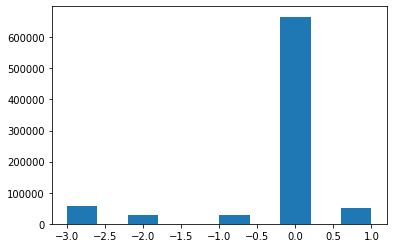

In [ ]:
print(colored('Estudio de errores de quarter predicho:\n', 'blue', attrs=['bold']))
print(colored('Total registros erroneos:', 'blue', attrs=[]), len(predicciones[predicciones['error_quarter']!= 0]))
print(colored('% registros erroneos: ', 'blue', attrs=[]), 
      colored(round(len(predicciones[predicciones['error_quarter']!= 0])/len(predicciones)*100, 2), 'red', attrs=[]),
      colored('%\n', 'red', attrs=[]), sep = '')
plt.hist(predicciones.error_quarter)

A través de la regresión lineal realizada en este apartado, en un 80.35% de los casos, acierta el cuartil de probabilidad de venta del producto siendo estos los siguientes:

1. **0-25%**: Probabilidad de venta **baja**
2. **25-50%**: Probabilidad de venta **media**
3. **50-75%**: Probabilidad de venta **media-alta**
4. **75-100%**: Probabilidad de venta **alta**

Puede que esto se dé por lo desbalanceada que está la variable `deal_probability`.

#XGBoost (`deal_probability`)
* **Training score**:  0.121

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import math
import time
import os.path
import gc
import random
import xgboost as xgb

In [ ]:
# Functions

def n_hash(s):
    # quick way of calculating a numeric hash for a string
    random.seed(hash(s))
    return random.random()

def hash_column (row, col):
    # hash a complete column of a pandas dataframe
    if col in row:
        return n_hash(row[col])
    return n_hash('none')

In [ ]:
df.columns

Index(['id', 'price', 'user_type', 'deal_probability', 'category',
       'subcategory', 'city', 'region', 'sold', 'has_image', 'has_size',
       'has_description', 'population', 'wage', 'federal_district', 'wage_fd',
       'ratio_population_wage', 'ratio_wages_fd_region',
       'porc_population_russia'],
      dtype='object')

In [ ]:
%%capture
# Calculate consistent numeric hashes for any categorical features 

train = df.copy()
# training data
train['region_hash'] = train.apply (lambda row: hash_column (row, 'region'),axis=1)
train['city_hash'] = train.apply (lambda row: hash_column (row, 'city'),axis=1)
train['subcategory_hash'] = train.apply (lambda row: hash_column (row, 'subcategory'),axis=1)
train['category_hash'] = train.apply (lambda row: hash_column (row, 'category'),axis=1)
train['fd_hash'] = train.apply (lambda row: hash_column (row, 'federal_district'),axis=1)
train['user_type_hash'] = train.apply (lambda row: hash_column (row, 'user_type'),axis=1)
#train.price[train.price == 0] = 0.01
train['price_log'] = np.log(train['price'])
train['population_log'] = np.log(train['population'])
train['wage_log'] = np.log(train['wage'])
train['wage_fd_log'] = np.log(train['wage_fd'])
train['ratio_population_wage_log'] = np.log(train['ratio_population_wage'])

train_X = train[['price_log', 'user_type_hash', 'category_hash',
       'subcategory_hash', 'city_hash', 'region_hash', 'has_image', 'has_size',
       'has_description', 'population_log', 'wage_log', 'fd_hash', 'wage_fd_log',
       'ratio_population_wage_log', 'ratio_wages_fd_region', 'porc_population_russia']]

In [ ]:
train_X.head(5)

,price_log,user_type_hash,category_hash,subcategory_hash,city_hash,region_hash,has_image,has_size,has_description,population_log,wage_log,fd_hash,wage_fd_log,ratio_population_wage_log,ratio_wages_fd_region,porc_population_russia
0,1.568616,0.542404,0.153013,0.156487,0.235627,0.293412,1,0,1,15.271813,6.239152,0.634151,6.583409,9.032661,1.410941,0.029378
1,3.583519,0.542404,0.247173,0.854123,0.326024,0.733355,1,0,1,14.964234,6.114487,0.340673,6.171701,8.849747,1.058882,0.021600
2,3.871201,0.542404,0.109976,0.952865,0.586068,0.784860,1,0,1,15.246177,6.031848,0.156793,6.175867,9.214329,1.154906,0.028635
3,3.273364,0.286125,0.153013,0.317781,0.991987,0.050687,1,0,1,15.174978,6.109727,0.340673,6.171701,9.065251,1.063934,0.026667
4,2.747271,0.542404,0.153013,0.317781,0.559406,0.050687,1,0,1,15.174978,6.109727,0.340673,6.171701,9.065251,1.063934,0.026667


In [ ]:
# Model and predictons

# Create a xgboost model
model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.05, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
# Start training
model.fit(train_X, train['deal_probability'])
# Predict the propabilities for binary classes --> pred = model.predict(test_X)

#model.fit(train_X, train['sold'])

[20:59:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=400, subsample=0.75)

In [ ]:
score = model.score(train_X, train['deal_probability'])
print("Training score:", score)

Training score: 0.12124646967324393


#Logistic Regression (`sold`)
* **Accuracy Score**: 0.7544
* **Specificity**: 0.9980
* **Sensitivity**: 0.0039
*La variable respuesta está muy desbalanceada*

In [ ]:
# Libraries

import numpy as np
import pandas as pd
import math
import os.path
import gc
import random
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Functions

def n_hash(s):
  # quick way of calculating a numeric hash for a string
  random.seed(hash(s))
  return random.random()

def hash_column (row, col):
  # hash a complete column of a pandas dataframe
  if col in row:
      return n_hash(row[col])
  return n_hash('none')

def to_sold(v):
  # creación de la variable objetivo binaria 'sold'
  if v == 0: x = 0
  else: x = 1
  return x

In [ ]:
# Calculate consistent numeric hashes for any categorical features 

train = df.copy()
# training data
train['region_hash'] = train.apply (lambda row: hash_column (row, 'region'),axis=1)
train['city_hash'] = train.apply (lambda row: hash_column (row, 'city'),axis=1)
train['subcategory_hash'] = train.apply (lambda row: hash_column (row, 'subcategory'),axis=1)
train['category_hash'] = train.apply (lambda row: hash_column (row, 'category'),axis=1)
train['fd_hash'] = train.apply (lambda row: hash_column (row, 'federal_district'),axis=1)
train['user_type_hash'] = train.apply (lambda row: hash_column (row, 'user_type'),axis=1)
train['price_log'] = np.log(train['price'])
train['population_log'] = np.log(train['population'])
train['wage_log'] = np.log(train['wage'])
train['wage_fd_log'] = np.log(train['wage_fd'])
train['ratio_population_wage_log'] = np.log(train['ratio_population_wage'])

train.replace([np.inf, -np.inf], np.nan, inplace=True)
train = train[train.price.notnull()]
train = train[train.price.notna()]
train.price_log[train.price_log.isna()] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train2 = train[['price_log', 'user_type_hash', 'category_hash',
       'region_hash', 'has_image', 'has_size', 'has_description', 
       'population_log', 'wage_log', 'fd_hash', 'wage_fd_log',
       'ratio_population_wage_log', 'ratio_wages_fd_region', 'porc_population_russia']]

train_X, test_X, train_y, test_y = train_test_split(train2, train['sold'], test_size = 0.3, random_state = 123)

In [ ]:
# Model and predictons

seed = 2002
model = LogisticRegression(random_state = seed)
scaler = RobustScaler()
pipeline = make_pipeline(scaler, model)
result = pipeline.fit(train_X, train_y)

y_predicted = result.predict(test_X)

Accuracy Score: 0.75443791738609
Specificity: 0.9980324098720215
Sensitivity: 0.003897228637413395 

Predecimos bien el 99.8% de los sold=0 bien y el 0.39% de los sold=1.

Confusion-matrix of the results:
[[234343    462]
 [ 75911    297]] 

Heat-map of the confusion-matrix:


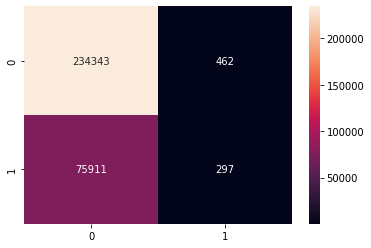

In [ ]:
matriz_confusion = confusion_matrix(test_y, y_predicted)

print(colored('Accuracy Score:', 'blue', attrs=['bold']), accuracy_score(test_y, y_predicted))

total1 = sum(sum(matriz_confusion))
Specificity = matriz_confusion[0,0]/(matriz_confusion[0,0]+matriz_confusion[0,1])
Sensitivity = matriz_confusion[1,1]/(matriz_confusion[1,0]+matriz_confusion[1,1])
print(colored('Specificity:', 'blue', attrs=['bold']), Specificity)
print(colored('Sensitivity:', 'blue', attrs=['bold']), Sensitivity, '\n')

print('Predecimos bien el ', round(Specificity*100, 2), '% de los sold=0 bien y el ', round(Sensitivity*100, 2), '% de los sold=1.\n', sep='')

print(colored('Confusion-matrix of the results:', 'blue', attrs=['bold']))
print(matriz_confusion, '\n')

print(colored('Heat-map of the confusion-matrix:', 'blue', attrs=['bold']))
sns.heatmap(matriz_confusion, annot=True, fmt='g')

Accuracy Score: 0.75424637000354
Specificity: 0.9980165677932528
Sensitivity: 0.0039492264786981715 

Predecimos bien el 99.8% de los sold=0 bien y el 0.39% de los sold=1.

Confusion-matrix of the results:
[[780930   1552]
 [253223   1004]] 

Heat-map of the confusion-matrix:


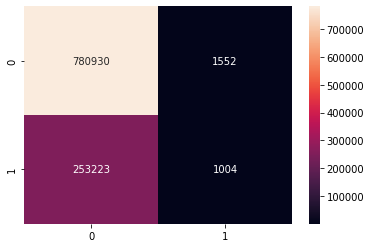

In [ ]:
# Sobre train_t completo

y_predicted_2 = result.predict(train2)

matriz_confusion = confusion_matrix(train.sold, y_predicted_2)

print(colored('Accuracy Score:', 'blue', attrs=['bold']), accuracy_score(train.sold, y_predicted_2))

total1 = sum(sum(matriz_confusion))
Specificity = matriz_confusion[0,0]/(matriz_confusion[0,0]+matriz_confusion[0,1])
Sensitivity = matriz_confusion[1,1]/(matriz_confusion[1,0]+matriz_confusion[1,1])
print(colored('Specificity:', 'blue', attrs=['bold']), Specificity)
print(colored('Sensitivity:', 'blue', attrs=['bold']), Sensitivity, '\n')

print('Predecimos bien el ', round(Specificity*100, 2), '% de los sold=0 bien y el ', round(Sensitivity*100, 2), '% de los sold=1.\n', sep='')

print(colored('Confusion-matrix of the results:', 'blue', attrs=['bold']))
print(matriz_confusion, '\n')

print(colored('Heat-map of the confusion-matrix:', 'blue', attrs=['bold']))
sns.heatmap(matriz_confusion, annot=True, fmt='g')